#数据可视化

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import xgboost as xgb
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Predict Hair Fall.csv")
df.head(5)

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [3]:
# 定义中文列名（12个特征和目标）
chinese_columns = [
    '遗传因素', 
    '荷尔蒙变化', 
    '医疗状况', 
    '药物及治疗', 
    '营养缺乏', 
    '压力水平', 
    '年龄', 
    '不良护发习惯', 
    '环境因素', 
    '吸烟习惯', 
    '体重减轻', 
    '脱发标记'   # 目标变量
]

# 将原始数据集的列名改为：第一列为'ID'，后面依次为chinese_columns中的12个列名
df.columns=['ID']+chinese_columns
df.head(5)

,ID,遗传因素,荷尔蒙变化,医疗状况,药物及治疗,营养缺乏,压力水平,年龄,不良护发习惯,环境因素,吸烟习惯,体重减轻,脱发标记
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


缺失值处理

In [4]:
df.replace("No Data",pd.NA,inplace=True)

In [5]:
df.head(5)

,ID,遗传因素,荷尔蒙变化,医疗状况,药物及治疗,营养缺乏,压力水平,年龄,不良护发习惯,环境因素,吸烟习惯,体重减轻,脱发标记
0,133992,Yes,No,<NA>,<NA>,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


二值列转换

In [6]:
# 二值列转换
binary_cols = ['遗传因素', '荷尔蒙变化', '不良护发习惯', '环境因素', '吸烟习惯', '体重减轻']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, pd.NA: np.nan})

# 创建高压力分组
df['高压力'] = df['压力水平'].apply(lambda x: 1 if x == 'High' else 0)
df.head(5)

,ID,遗传因素,荷尔蒙变化,医疗状况,药物及治疗,营养缺乏,压力水平,年龄,不良护发习惯,环境因素,吸烟习惯,体重减轻,脱发标记,高压力
0,133992,1.0,0.0,<NA>,<NA>,Magnesium deficiency,Moderate,19,1.0,1.0,0.0,0.0,0,0
1,148393,0.0,0.0,Eczema,Antibiotics,Magnesium deficiency,High,43,1.0,1.0,0.0,0.0,0,1
2,155074,0.0,0.0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1.0,1.0,0.0,1.0,0,0
3,118261,1.0,1.0,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1.0,1.0,0.0,0.0,0,0
4,111915,0.0,0.0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0.0,1.0,1.0,0.0,1,0


数据可视化

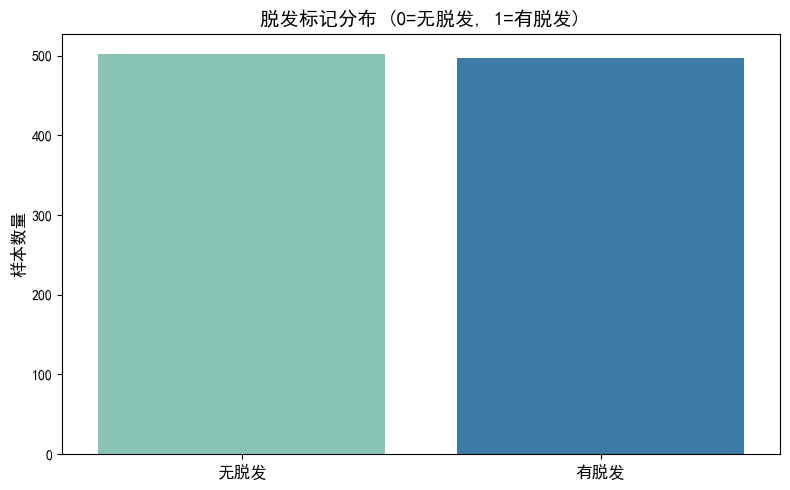

脱发比例: 49.7%


In [8]:
# 脱发标记分布
plt.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(8, 5))
sns.countplot(x='脱发标记', data=df, legend=False, hue='脱发标记',  palette=['#7fcdbb', '#2c7fb8'])
plt.title('脱发标记分布 (0=无脱发, 1=有脱发)', fontsize=14)
plt.xlabel('')
plt.ylabel('样本数量', fontsize=12)
plt.xticks([0, 1], ['无脱发', '有脱发'], fontsize=12)
plt.tight_layout()
plt.show()

# 计算脱发比例
hair_loss_rate = df['脱发标记'].mean() * 100
print(f"脱发比例: {hair_loss_rate:.1f}%")

年龄与脱发关系

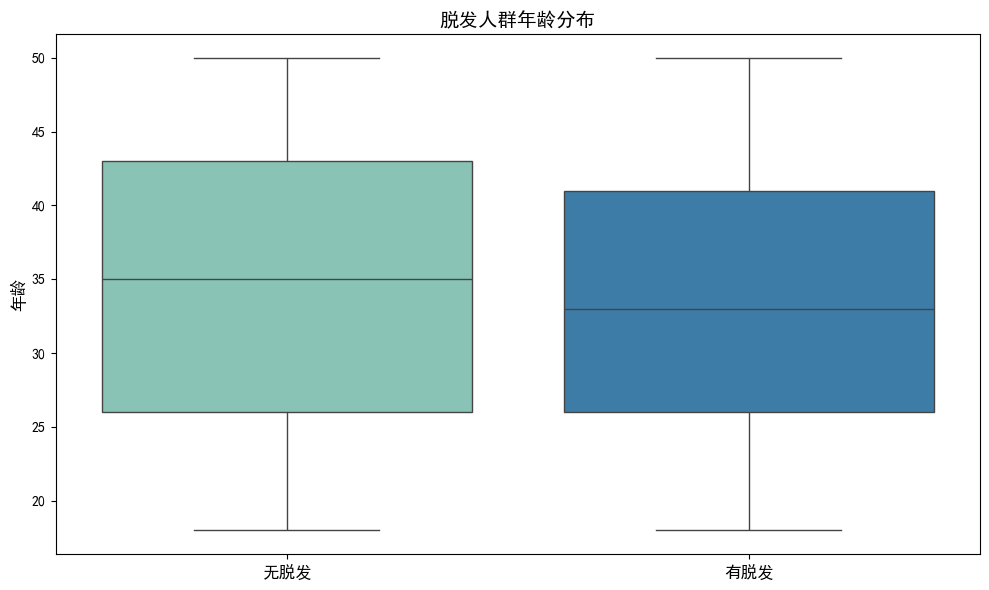

In [9]:
# 年龄与脱发关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='脱发标记', y='年龄', data=df, legend=False, hue='脱发标记', palette=['#7fcdbb', '#2c7fb8'])
plt.title('脱发人群年龄分布', fontsize=14)
plt.xlabel('')
plt.ylabel('年龄', fontsize=12)
plt.xticks([0, 1], ['无脱发', '有脱发'], fontsize=12)
plt.tight_layout()
plt.show()

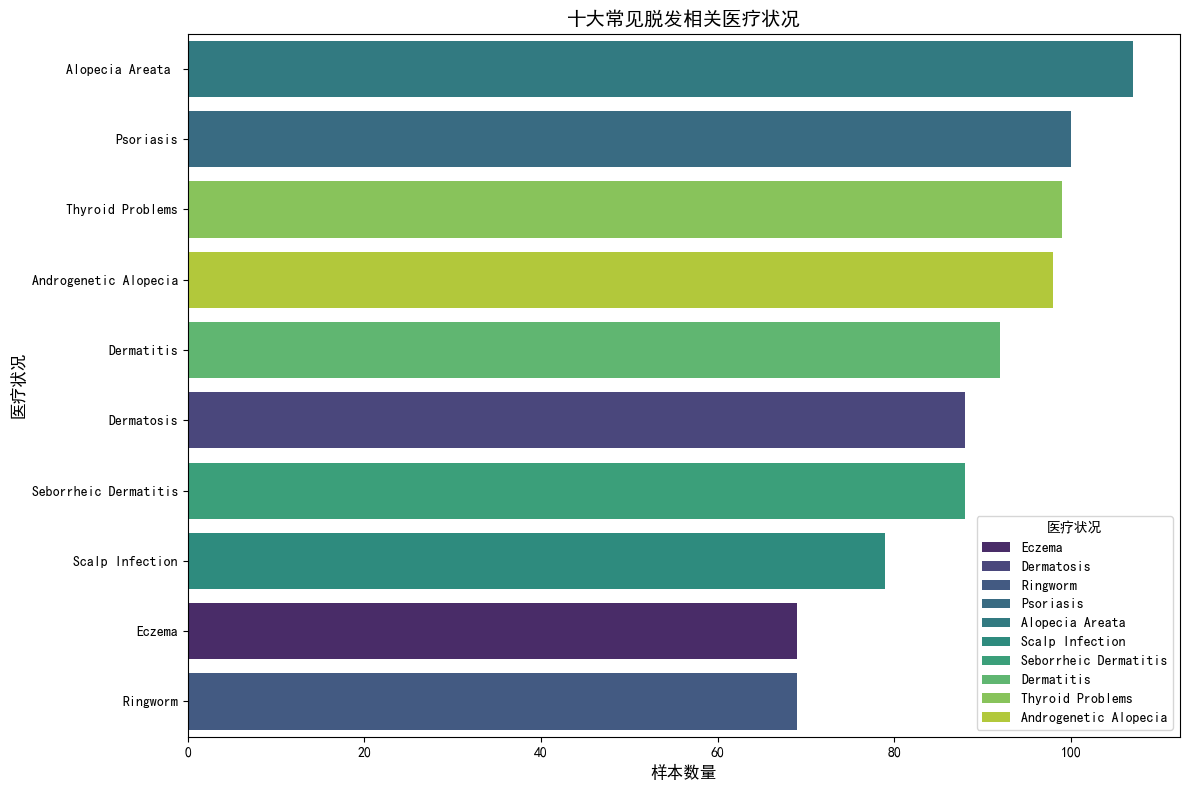

In [10]:
# 常见医疗状况分析
plt.figure(figsize=(12, 8))
top_conditions = df['医疗状况'].value_counts().head(10).index
ax = sns.countplot(y='医疗状况', data=df, hue = '医疗状况',
               order=top_conditions, 
               palette=sns.color_palette("viridis", 10))

plt.title('十大常见脱发相关医疗状况', fontsize=14)
plt.xlabel('样本数量', fontsize=12)
plt.ylabel('医疗状况', fontsize=12)
plt.tight_layout()
plt.show()

常见脱发相关营养缺乏类型

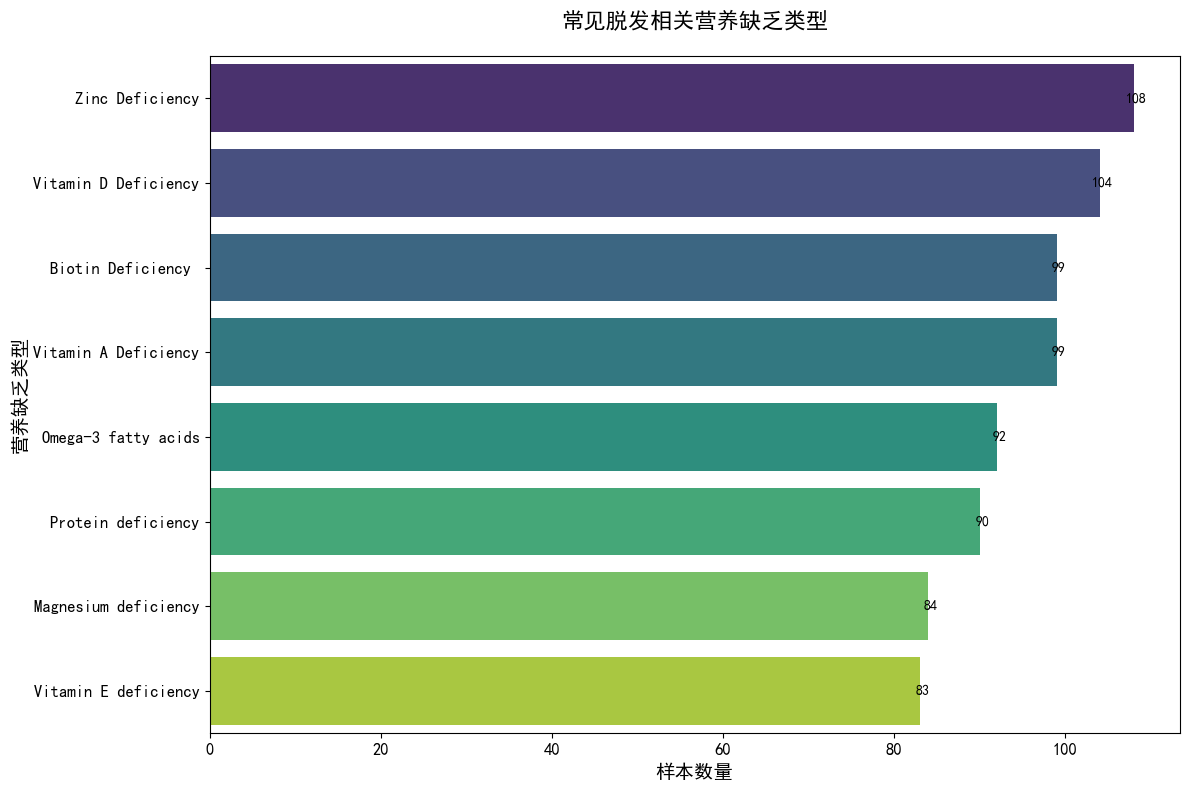

In [11]:
plt.figure(figsize=(12, 8))

# 获取Top8类别
top_nutrition = df['营养缺乏'].value_counts().head(8).index

ax = sns.countplot(
    y='营养缺乏',
    data=df,
    hue='营养缺乏',
    order=top_nutrition,        
    hue_order=top_nutrition,    
    palette=sns.color_palette("viridis", len(top_nutrition)),  # 动态匹配颜色数量
    legend=False
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 0.3, p.get_y() + p.get_height()/2),
                ha='center', va='center', fontsize=10)

plt.title('常见脱发相关营养缺乏类型', fontsize=16, pad=20)
plt.xlabel('样本数量', fontsize=14)
plt.ylabel('营养缺乏类型', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

二值特征与脱发关系

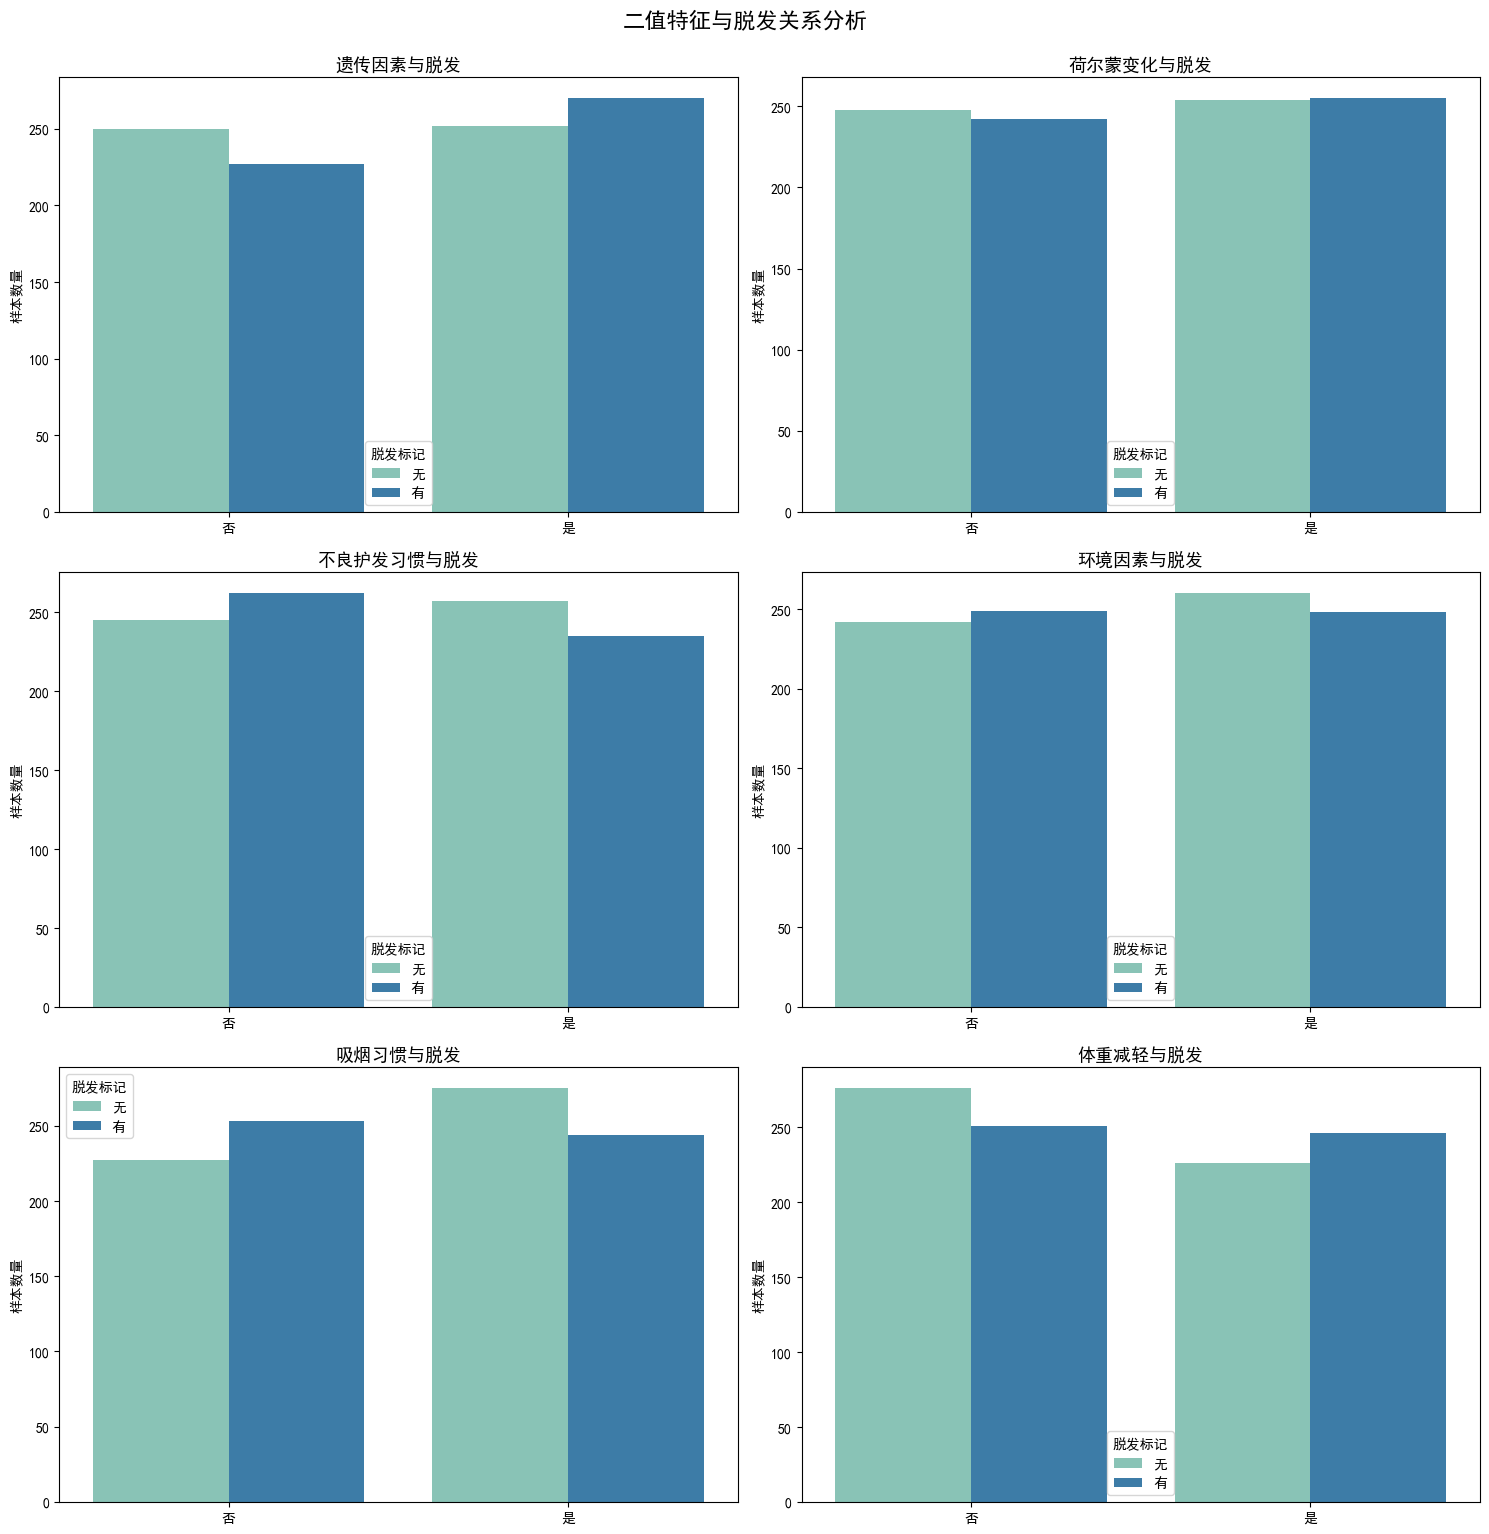

In [12]:
# 二值特征与脱发关系
features = ['遗传因素', '荷尔蒙变化', '不良护发习惯', '环境因素', '吸烟习惯', '体重减轻']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        sns.countplot(x=feature, hue='脱发标记', data=df, 
                     palette=['#7fcdbb', '#2c7fb8'], ax=axes[i])
        axes[i].set_title(f'{feature}与脱发', fontsize=13)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels(['否' if t == 0 else '是' for t in [0, 1]])
        axes[i].set_ylabel('样本数量')
        axes[i].legend(title='脱发标记', labels=['无', '有'])

plt.tight_layout()
plt.suptitle('二值特征与脱发关系分析', fontsize=16, y=1.02)
plt.show()

特征相关性分析

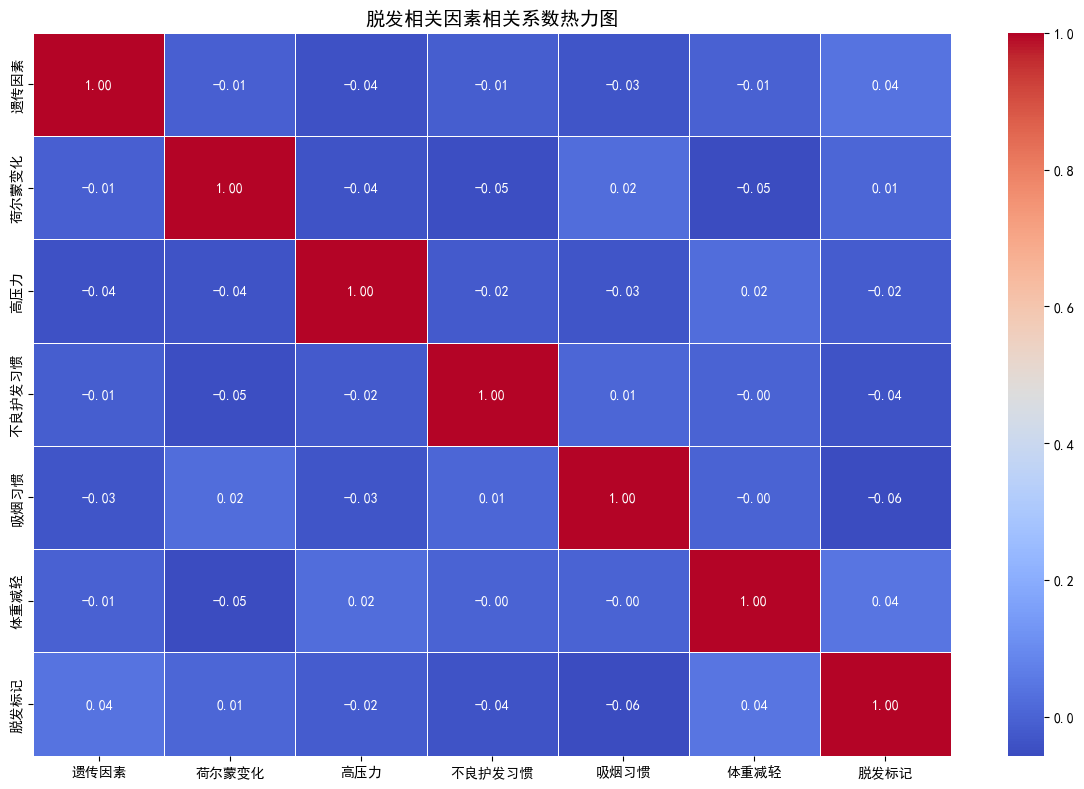

In [13]:
# 特征相关性分析
corr_features = ['遗传因素', '荷尔蒙变化', '高压力', '不良护发习惯', '吸烟习惯', '体重减轻', '脱发标记']
corr = df[corr_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('脱发相关因素相关系数热力图', fontsize=14)
plt.tight_layout()
plt.show()

模型预测
使用随机森林及其XGBOOST

In [14]:
df.head(5)

,ID,遗传因素,荷尔蒙变化,医疗状况,药物及治疗,营养缺乏,压力水平,年龄,不良护发习惯,环境因素,吸烟习惯,体重减轻,脱发标记,高压力
0,133992,1.0,0.0,<NA>,<NA>,Magnesium deficiency,Moderate,19,1.0,1.0,0.0,0.0,0,0
1,148393,0.0,0.0,Eczema,Antibiotics,Magnesium deficiency,High,43,1.0,1.0,0.0,0.0,0,1
2,155074,0.0,0.0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1.0,1.0,0.0,1.0,0,0
3,118261,1.0,1.0,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1.0,1.0,0.0,0.0,0,0
4,111915,0.0,0.0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0.0,1.0,1.0,0.0,1,0


特征工程

In [17]:
df.dropna(subset=['脱发标记','医疗状况','药物及治疗','营养缺乏'],inplace=True)
df['遗传高压力组合']=((df['遗传因素']==1)&(df['高压力']==1)).astype(int)

In [18]:
#标签编码分类变量
label_encoders={}
categorical_cols=['医疗状况','药物及治疗','营养缺乏','压力水平']
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col].astype(str))
    label_encoders[col]=le
df.head(5)

,ID,遗传因素,荷尔蒙变化,医疗状况,药物及治疗,营养缺乏,压力水平,年龄,不良护发习惯,环境因素,吸烟习惯,体重减轻,脱发标记,高压力,遗传高压力组合
1,148393,0.0,0.0,4,1,2,0,43,1.0,1.0,0.0,0.0,0,1,0
2,155074,0.0,0.0,3,3,4,2,26,1.0,1.0,0.0,1.0,0,0,0
3,118261,1.0,1.0,6,1,0,2,46,1.0,1.0,0.0,0.0,0,0,0
4,111915,0.0,0.0,5,0,1,2,30,0.0,1.0,1.0,0.0,1,0,0
5,139661,1.0,0.0,5,1,2,1,37,0.0,1.0,0.0,1.0,1,0,0


In [20]:
# 特征选择（部分可能部分重复，但影响不大）
features = [
    '遗传因素', '荷尔蒙变化', '医疗状况', '药物及治疗', 
    '营养缺乏', '压力水平', '年龄', '不良护发习惯', 
    '环境因素', '吸烟习惯', '体重减轻', '高压力',
    '遗传高压力组合'
]
X=df[features]
y=df['脱发标记']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [10, 15],
    'class_weight': ['balanced', None]
}
grid_rf=GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,#小数据用3折交叉验证（减少计算量）
    scoring='f1',#用F1平衡precision/reall
    n_jobs=-1#并行加速
)

In [30]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [5, 7], 'min_samples_split': [10, 15],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [31]:
best_rf=grid_rf.best_estimator_

In [33]:
#XGbost
param_grid_xgb={
    'n_estimators':[50,100],
    'max_depth':[3,5],
    'learning_rate':[0.1,0.2],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9]
}
grid_xgb=GridSearchCV(
    xgb.XGBClassifier(objective='binary:logistic',random_state=42),
    param_grid_xgb,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

In [34]:
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 0.9]},
             scoring='f1')

In [35]:
best_xgb=grid_xgb.best_estimator_

In [39]:
y_pred=grid_xgb.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0])

In [40]:
y_pred=grid_rf.predict(X_test)

In [41]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [45]:
# 模型评估函数
def evaluate_model(model, X_test, y_test, model_name):
    """评估模型并绘制ROC曲线"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # 评估报告
    print(f"=== {model_name} 评估报告 ===")
    print(classification_report(y_test, y_pred))
    
    # ROC曲线
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC曲线 (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率', fontsize=12)
    plt.ylabel('真阳性率', fontsize=12)
    plt.title(f'{model_name} ROC曲线', fontsize=14)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    # 特征重要性
    if hasattr(model, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            '特征': features,
            '重要性': model.feature_importances_
        }).sort_values('重要性', ascending=False)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='重要性', y='特征', data=feature_imp, palette='viridis')
        plt.title(f'{model_name} 特征重要性', fontsize=14)
        plt.xlabel('重要性', fontsize=12)
        plt.ylabel('特征', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    return roc_auc

=== 随机森林 评估报告 ===
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        80
           1       0.51      0.51      0.51        82

    accuracy                           0.50       162
   macro avg       0.50      0.50      0.50       162
weighted avg       0.50      0.50      0.50       162



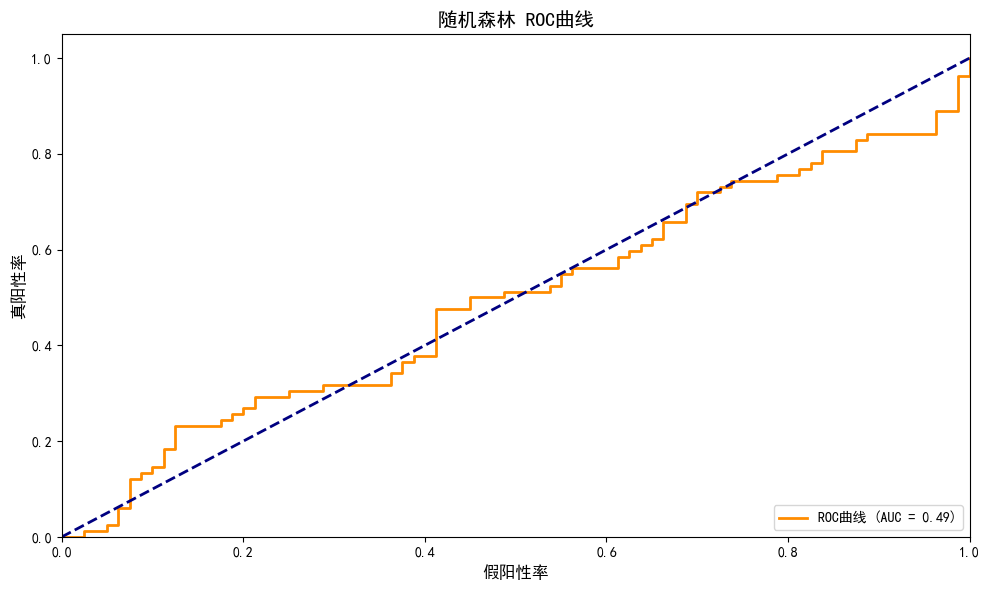

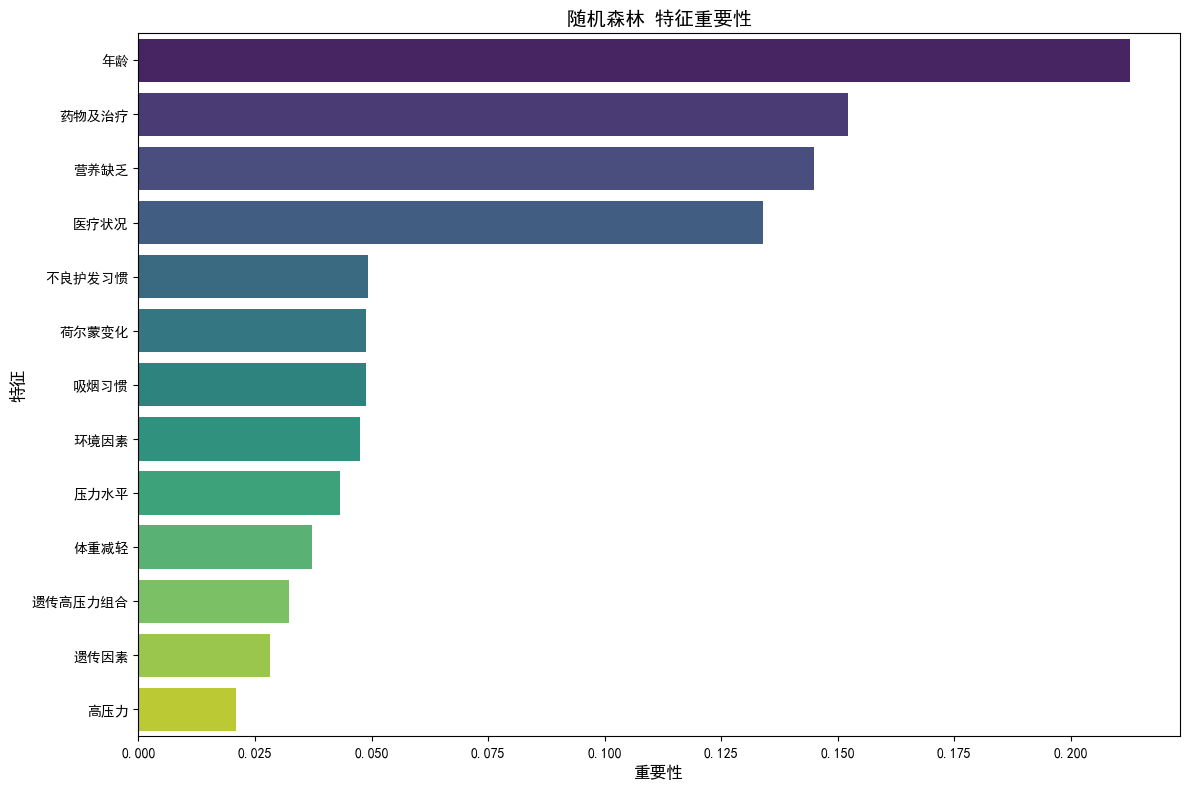

=== XGBoost 评估报告 ===
              precision    recall  f1-score   support

           0       0.49      0.46      0.48        80
           1       0.51      0.54      0.52        82

    accuracy                           0.50       162
   macro avg       0.50      0.50      0.50       162
weighted avg       0.50      0.50      0.50       162



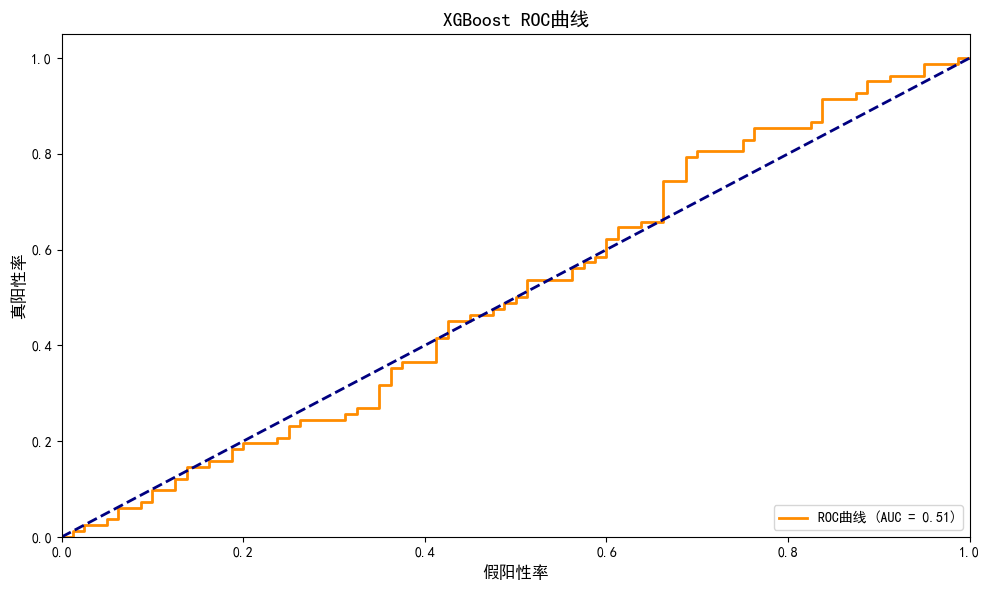

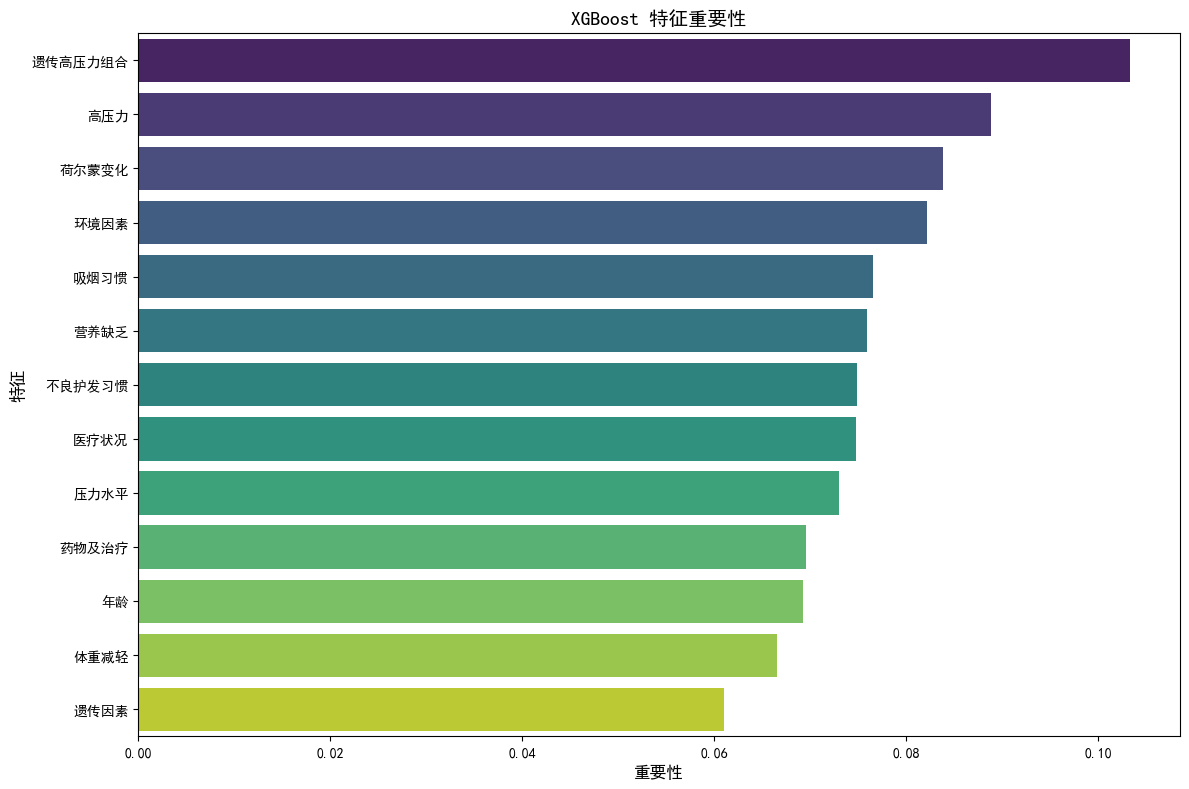

In [46]:
rf_auc=evaluate_model(best_rf,X_test,y_test,"随机森林")
xgb_auc = evaluate_model(best_xgb, X_test, y_test, "XGBoost")